# Analytical

In [64]:
n   = 200 # file number,
nr  = 638  # the radial grid in circular.par
ntheta = 1024 # the azimuthal grid number in circular.par

# ln(rmax / rmin) / 2pi * ntheta = nr

r inner: 1.0
r outer: 1.0
theta inner: 6.283185307179587
theta: 200.0
time:  0.0
r inner: 0.9968584073464102
r outer: 1.0031415926535898
theta inner: 6.283259523536043
theta: 200.0
time:  1.0
r inner: 0.9937168146928204
r outer: 1.0062831853071796
theta inner: 6.283482954197225
theta: 200.0
time:  2.0
r inner: 0.9905752220392307
r outer: 1.0094247779607695
theta inner: 6.283856781304228
theta: 200.0
time:  3.0
r inner: 0.9874336293856408
r outer: 1.0125663706143593
theta inner: 6.284382200151431
theta: 200.0
time:  4.0
r inner: 0.984292036732051
r outer: 1.0157079632679489
theta inner: 6.285060419375302
theta: 200.0
time:  5.0
r inner: 0.9811504440784612
r outer: 1.0188495559215387
theta inner: 6.285892661146445
theta: 200.0
time:  6.0
r inner: 0.9780088514248715
r outer: 1.0219911485751285
theta inner: 6.286880161365139
theta: 200.0
time:  7.0
r inner: 0.9748672587712817
r outer: 1.0251327412287183
theta inner: 6.288024169860212
theta: 200.0
time:  8.0
r inner: 0.9717256661176918
r ou

NameError: name 'xcoord' is not defined

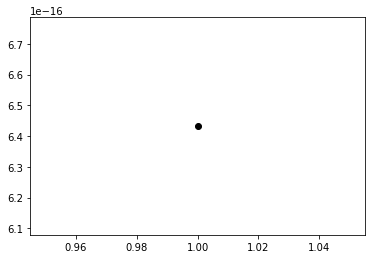

In [65]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir("/Users/RaymondMZhang/Downloads/fargo/outcircular")

# definitions
rmin = 0.2
r_p = 1
rmax = 3
dr = (rmax-rmin)/n
omega_p = 1
cs_p = 0.1
alpha = 1.5
beta = 0
theta_naught = 0
degree = math.pi/100

# reading planet data
planet = open('planet0.dat', 'r')

# finding planet point at 0
for line in planet: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    arr = line.split() # Split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    if arr[0] == n:
        planetx = arr[1]
        planety = arr[2]

# the radius of this circular orbit is just planetx since planety = 0
# radius = (planetx**2 + planety**2)**(0.5)
radius = 1

# arrays with the inner and outer points separately
# first n is which point the planet is positioned
# second n is how many points the spiral creates up to
# the 2 means each point has an (x,y)
innerpointarray = np.empty((n+1,n,2),float)
outerpointarray = np.empty((n+1,n,2),float)

# theta_naught is the angle of the planet position respect to the original point of the planet
for theta_naught in np.arange (n*degree,(n+1)*degree,degree):
    
    # planet changes position, so each new position is at (planetx, planety)
    planetx = radius * math.cos(theta_naught)
    planety = radius * math.sin(theta_naught)
    
    # plots the planet position with a black dot
    plt.plot(planetx,planety, color = 'black', marker = 'o')
    
    # x_inner and y_inner are the x and y points of the inner spiral
    # x_outer and y_outer are the x and y points of the outer spiral
    # x_inner, y_inner, x_outer, y_outer are not required for the overall code
#     x_inner = []
#     y_inner = []
#     x_outer = []
#     y_outer = []
    
    #drawing the spirals
    for t in np.arange (0,n*degree,degree):
        
        # the radius is changing at a rate of cs_p (- for inner and + for outer)
        r_inner = r_p - cs_p * t
        r_outer = r_p + cs_p * t
        print("r inner:", r_inner)
        print("r outer:", r_outer)
        
        # defining variables for clarity
        C = r_p * omega_p / cs_p
        a_inner = r_inner / r_p
        a_outer = r_outer / r_p
        f = beta - alpha + 1
        g = beta + 1
        
        # from previously solved equation (error for n > 10, I don't know why: Says theta_inner becomes infinity)
        theta_inner = theta_naught - C * ((a_inner**f/f - a_inner**g/g) - (1/f - 1/g))
        print("theta inner:", theta_inner)
        theta_outer = theta_naught + C * ((a_outer**f/f - a_outer**g/g) - (1/f - 1/g))
        
        # I have the values of the x and y coordinates put into multiple arrays for clarity
        # x_inner, y_inner, x_outer, y_outer are not required for the overall code
#         x_inner.append(r_inner * math.cos(theta_inner))
#         y_inner.append(r_inner * math.sin(theta_inner))
#         x_outer.append(r_outer * math.cos(theta_outer))
#         y_outer.append(r_outer * math.sin(theta_outer))
        
        print("theta:", theta_naught/degree)
        print("time: ", t/degree)
        innerpointarray[int(theta_naught/degree)][int(t/degree)][0] = (r_inner * math.cos(theta_inner))
        innerpointarray[int(theta_naught/degree)][int(t/degree)][1] = (r_inner * math.sin(theta_inner))
        outerpointarray[int(theta_naught/degree)][int(t/degree)][0] = (r_outer * math.cos(theta_outer))
        outerpointarray[int(theta_naught/degree)][int(t/degree)][1] = (r_outer * math.sin(theta_outer))
        

# graphing the points specifically
# i is which n (or planet position)
# j is which point the spiral at i creates
# i + j has to equal n-1
# for example, in this case, n = 10
# i starts as 0, requiring j to be 9
# repeats all the way until i is 9 and j is 0
#for i in range(n):
plt.contourf(xcoord, ycoord, rho, levels = levels)

i = n
for j in range(n):
    #if i + j == n-1:

    # plot the inner points as blue and the outer points as red
    # the point created for n = 10 in this case is just the black dot positioned where the planet is
    plt.scatter(innerpointarray[i][j][0],innerpointarray[i][j][1], color = 'blue', marker = 'o')
    plt.scatter(outerpointarray[i][j][0],outerpointarray[i][j][1], color = 'red', marker = 'o')


# rest of the plotting details
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()                 

# Numerical

Populating the interactive namespace from numpy and matplotlib


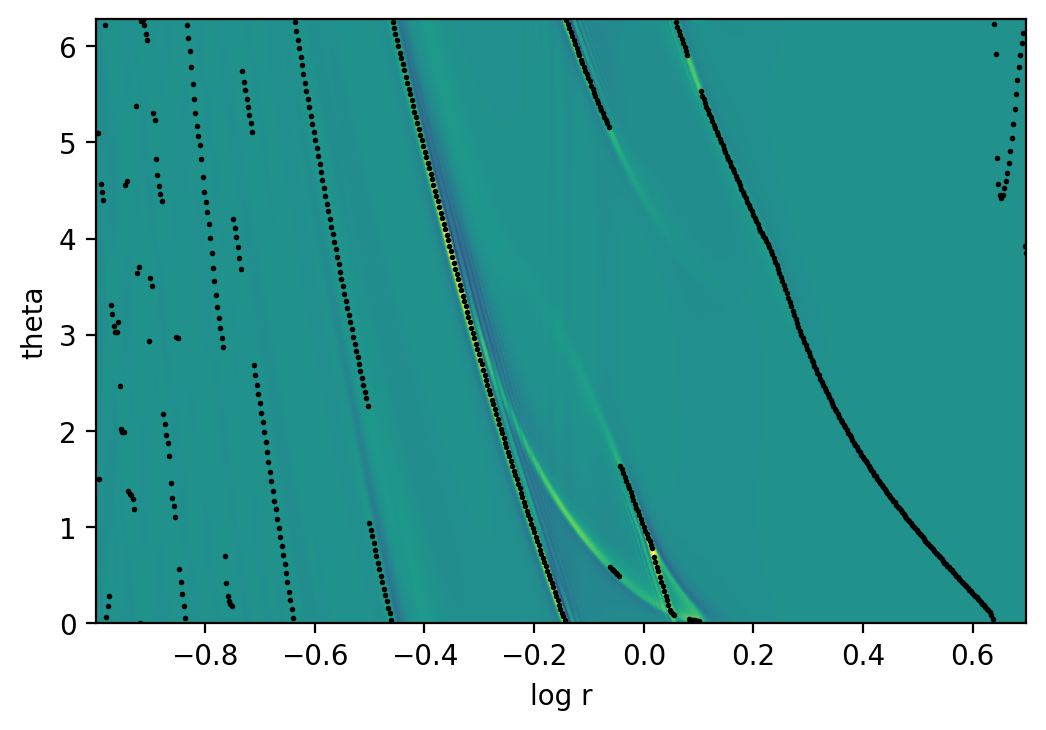

In [77]:
# read in data
import os
import math
%pylab inline

n2   = 200 # file number,
nr  = 638  # the radial grid in circular.par
ntheta = 1024 # the azimuthal grid number in circular.par

os.chdir("./out2eccentricity0p25")
rho = fromfile("gasdens{0:d}.dat".format(n2), dtype='float64').reshape(nr, ntheta) #change dtype to 'float32' if your simulation is single precision
rho = np.transpose(rho)

file = open('used_rad.dat', 'r')
planet = open('planet0.dat', 'r')
os.chdir("../")

rad = []

plt.figure(figsize = (6, 4), dpi=200)

# ln(rmax / rmin) / 2pi * ntheta = nr
for line in file: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    columns = line.split() # Split the string into many columns
    rad = np.append(rad, float(columns[0])) # convert the column into floating numbers
    

for line in planet: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    arr = line.split() # Split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    if arr[0] == n2:
        planetx = arr[1]
        planety = arr[2]
#print(planetx, planety)
    

rad = (rad[1:] + rad[0:-1]) / 2. # change cell edge to cell center
theta = np.arange(0.0,2. * np.pi,2. * np.pi / ntheta)


import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

zmin = 0.99
zmax = 1.01
levels = np.linspace(zmin, zmax, 200)
# plt.contourf(xcoord, ycoord, rho, levels = levels)
# print(len(theta))
# for i in range(len(rad)):
#     plt.scatter(np.log10(rad), theta)
plt.contourf(np.log10(rad), theta, rho, levels = levels)
# for i in range (len(theta)):
#     largest = 0 
#     for j in range (len(rad)):
#         print(i,j)
#         if rho[i][j] > largest:
#             largest = rho[i][j]
#             largest_i = i
#             largest_j = j
brightest_rad = []
brightest_theta = []
for j in range (len(rad)):
    largest = 0 
    for i in range (len(theta)):
#         print(i,j)
        if rho[i][j] > largest:
            largest = rho[i][j]
            largest_i = i
            largest_j = j
    brightest_rad.append(rad[largest_j])
    brightest_theta.append(theta[largest_i])
    plt.scatter(np.log10(rad[largest_j]), theta[largest_i], color = "black", marker = 'o', s = 1)

# dividers = [0]
# for i in range(len(brightest_theta)-1):
#     if brightest_theta[i] < brightest_theta[i+1]:
#         dividers.append(i)
# dividers.append(638)
#plt.plot(x,y)
# plt.plot(planetx,planety, color = 'black', marker = 'o')
#plt.xlim([-1.,0.5])
#plt.xlabel('log(r)')
#plt.ylim([0.,2*math.pi])
plt.ylabel('theta') 
# plt.xlim([-2,2])
plt.xlabel('log r')
# plt.ylim([-2,2])
# plt.ylabel('phi')
plt.show()

In [9]:
print(dividers)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530
 540 550 560 570 580 590 600 610 620 630]


In [62]:
dividers = np.arange(0,600,10)
slopes = []
special_rad = []
for i in range(len(dividers) - 1):
    point1 = math.floor((dividers[i+1] + dividers[i]) / 2) - 2
    point2 = point1 + 2
    special_rad.append(brightest_rad[point1 + 1])
    print(point1,point2)
    
    print(brightest_theta[point1], np.log(brightest_rad[point1]))
    print(brightest_theta[point2], np.log(brightest_rad[point2]))
    
    slope = np.arctan((np.log(brightest_rad[point2]) - np.log(brightest_rad[point1])) / (brightest_theta[point2] - brightest_theta[point1]))
    slopes.append(slope)
    print(slope*180/math.pi)
    
slopes = np.array(slopes)
special_rad = np.array(special_rad)

3 5
4.571262747899211 -2.2811194520347793
4.399456899656019 -2.268856057033437
-4.0828126401826506
13 15
3.0250101137104846 -2.2198024770280687
3.129320807286708 -2.2075390820267264
6.705258007359711
23 25
1.3437671701878218 -2.1584855020213576
1.2946797849754812 -2.1462221070200154
-14.026958829559291
33 35
6.22182607566416 -2.097168527014647
6.062292073724054 -2.0849051320133047
-4.395687957518974
43 45
4.546719055293041 -2.0358515520079363
4.387185053352934 -2.023588157006594
-4.395687957518974
53 55
1.2210487071569704 -1.9745345770012257
2.9759227284981438 -1.9622711819998835
0.40038733840250496
63 65
6.080699843178682 -1.9132176019945146
5.780039608753096 -1.9009542069931726
-2.335698000626177
73 75
4.638757902566179 -1.851900626987804
4.381049130201391 -1.839637231986462
-2.7244362841701864
83 85
3.2888548092268146 -1.7905836519810931
3.067961575771282 -1.778320256979751
-3.1776447427178565
93 95
0.17794177139473438 -1.7292666769743825
4.104932588381976 -1.7170032819730403
0.1789

In [29]:
print(brightest_theta[50], brightest_rad[50])

2.3623304133438876 0.1362955390798265


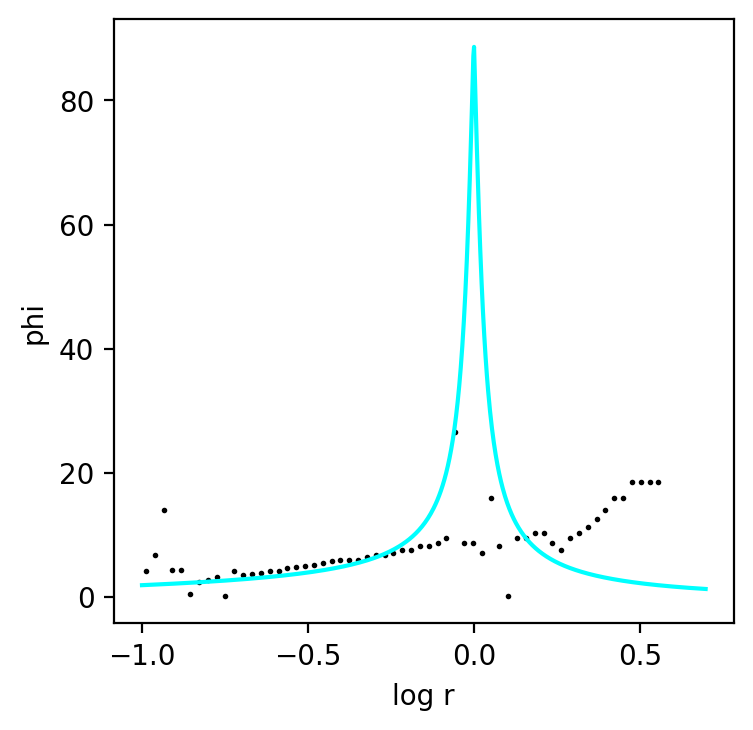

In [63]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2circular")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p1")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p25")
# os.chdir("/Users/RaymondMZhang/Downloads/fargo/out2eccentricity0p5")


# definitions
rmin = 0.1
r_p = 1.0
rmax = 5
n = 1000
dr = (rmax-rmin)/n
cs_p = 0.1
alpha = 1.5
beta = 0
degree = math.pi/100
dt = 0.0314159265359
plt.figure(figsize = (4, 4), dpi=200)

r = np.arange(rmin,rmax,dr)
C = 1 / cs_p
f = beta - alpha + 1
g = beta + 1

phi = np.arctan(-1 / C / ((r)**(g) - (r)**(f))) * 360 / 2 / math.pi * (r_p-r) / abs(r_p-r)
plt.plot(np.log10(r), phi, color = "cyan")


plt.scatter(np.log10(special_rad), np.abs(slopes / math.pi * 180), color = "black", s = 1)

# for t in np.arange (1,n+1):
#     r_inner = r_p_array[n-t] - cs_p * dt * t
#     a_inner = r_inner / r_c_array[n-t]
#     phi_inner = np.arctan(- 1 / (C[n-t]) / ((a_innr)**(g) - (a_inner)**(f)) * 360 / 2 / math.pi)
#     plt.scatter(phi_inner, math.log(r_inner), color = "cyan", s = 50)
    
#     r_outer = r_p_array[n-t] + cs_p * dt * t
#     a_outer = r_outer / r_c_array[n-t]
#     phi_outer = np.arctan(- 1 / (C[n-t]) / ((a_outer)**(g) - (a_outer)**(f)) * 360 / 2 / math.pi)
#     plt.scatter(phi_outer, math.log(r_outer), color = "cyan", s = 50)



# rest of the plotting details
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('log r')
plt.ylabel('phi')
plt.show()                 

In [ ]:
print(len(brightest_rad), len(brightest_theta))

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir("/Users/RaymondMZhang/Downloads/fargo/outcircular")

rmin = 0.2
r_p = 1
rmax = 3
dr = (rmax-rmin)/n
print(dr)

omega_p = 1
cs_p = 0.1
alpha = 1.5
beta = 0
theta_naught = 0

for deta in np.arange (0,math.pi/9,math.pi/9):
    planetx = radius * math.cos(deta)
    planety = radius * math.sin(deta)
    plt.plot(planetx,planety, color = 'black', marker = 'o')
    
    #drawing the spirals
    
    x = []
    y = []
    for r in np.arange (rmin, rmax, 0.1):
        if r > r_p:
            C = r_p * omega_p / cs_p
            a = r / r_p
            f = beta - alpha + 1
            g = beta + 1
            theta = theta_naught + C * ((a**f/f - a**g/g) - (1/f - 1/g)) + deta
            x.append(r * math.cos(theta))
            y.append(r * math.sin(theta))
        else:
            C = r_p * omega_p / cs_p
            a = r / r_p
            f = beta - alpha + 1
            g = beta + 1
            theta = theta_naught - C * ((a**f/f - a**g/g) - (1/f - 1/g)) + deta
            x.append(r * math.cos(theta))
            y.append(r * math.sin(theta))
    plt.plot(x,y)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()                 

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os

os.chdir("/Users/RaymondMZhang/Downloads/fargo/outcircular")

rmin = 0.2
r_p = 1
rmax = 3
dr = (rmax-rmin)/n
print(dr)

omega_p = 1
cs_p = 0.1
alpha = 1.5
beta = 0
theta_naught = 0

# x = np.empty((n),int)
# x = []
# y = np.empty((n),int)
# y = []

timearray = np.empty((n,n),int)
for i in np.arange(n):  # the n that incited the spiral
    for j in np.arange(n):  # the step
        timearray[i][j] = i+j
planet = open('planet0.dat', 'r')

for line in planet: # loop through every line in the file
    line = line.strip() # the strip() removes characters from both left and right 
    arr = line.split() # split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    if arr[0] == n:
        planetx = arr[1]
        planety = arr[2]


innerpointarray = np.empty((2*n,n,2),float)
outerpointarray = np.empty((2*n,n,2),float)

radius = planetx
for deta in np.arange (0,2*(n)*math.pi/9,math.pi/9):
    planetx = radius * math.cos(deta)
    planety = radius * math.sin(deta)
    plt.plot(planetx,planety, color = 'black', marker = 'o')
    
    #drawing the spirals
    x_inner = []
    y_inner = []
    x_outer = []
    y_outer = []
    for t in np.arange (0,n,1):
        r_inner = r_p - cs_p * t
        r_outer = r_p + cs_p * t
        C = r_p * omega_p / cs_p
        a_inner = r_inner / r_p
        a_outer = r_outer / r_p
        f = beta - alpha + 1
        g = beta + 1
        theta_inner = theta_naught - C * ((a_inner**f/f - a_inner**g/g) - (1/f - 1/g)) + deta
        theta_outer = theta_naught + C * ((a_outer**f/f - a_outer**g/g) - (1/f - 1/g)) + deta
        x_inner.append(r_inner * math.cos(theta_inner))
        y_inner.append(r_inner * math.sin(theta_inner))
        x_outer.append(r_outer * math.cos(theta_outer))
        y_outer.append(r_outer * math.sin(theta_outer))
        innerpointarray[int(deta*9/math.pi)][t][0] = (r_inner * math.cos(theta_inner))
        innerpointarray[int(deta*9/math.pi)][t][1] = (r_inner * math.sin(theta_inner))
        outerpointarray[int(deta*9/math.pi)][t][0] = (r_outer * math.cos(theta_outer))
        outerpointarray[int(deta*9/math.pi)][t][1] = (r_outer * math.sin(theta_outer))
    
#     for i in range(10):
#         print(x_inner[i], y_inner[i])
#     print("")
        
#    plt.plot(x_inner,y_inner)
#    plt.plot(x_outer,y_outer)
    
print(innerpointarray)


i = 5
for j in range(i):
    print(j,i-j)
    plt.scatter(innerpointarray[i][i-j][0],innerpointarray[i][i-j][1])
    plt.scatter(outerpointarray[i][i-j][0],outerpointarray[i][i-j][1])
        

#print(len(x), len(y))
#plt.xlim(-0.01,0.01)
#plt.ylim(-0.01,0.01)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.6, top=0.8)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()                 